In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases # Python has a file containing a dictionary of encoding names and associated aliases

# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

In [2]:
# To find encodings that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful cp864
successful cp1026
successful big5hkscs
successful iso8859_13
successful cp857
successful mac_cyrillic
successful cp437
successful cp850
successful iso8859_15
successful ptcp154
successful iso8859_7
successful utf_16_be
successful cp273
successful iso8859_9
successful kz1048
successful latin_1
successful iso8859_14
successful mac_latin2
successful iso8859_3
successful cp852
successful iso8859_10
successful cp037
successful cp500
successful iso8859_4
successful cp860
successful cp949
successful iso8859_5
successful cp863
successful cp855
successful gb18030
successful iso8859_2
successful cp865
successful cp869
successful cp775
successful cp1250
successful mac_roman
successful utf_16_le
successful cp1255
successful cp1253
successful cp1257
successful cp1125
successful iso8859_8
successful cp1140
successful cp862
successful cp932
successful cp1254
successful mac_iceland
successful gbk
successful cp861
successful mac_greek
successful koi8_r
successful iso8859_16
successful 

In [3]:
# Read in the crime.csv file and use the timestamp as a datetime index
mushroom = pd.read_csv("mushroom_cleaned.csv", encoding="ISO-8859-11")

In [4]:
mushroom.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [6]:
mushroom.shape

(54035, 9)

In [7]:
mushroom.duplicated().sum() # Counting the duplicate rows

303

In [9]:
mushroom.drop_duplicates(inplace=True)

In [10]:
mushroom.shape

(53732, 9)

In [11]:
mushroom.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [12]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53732 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     53732 non-null  int64  
 1   cap-shape        53732 non-null  int64  
 2   gill-attachment  53732 non-null  int64  
 3   gill-color       53732 non-null  int64  
 4   stem-height      53732 non-null  float64
 5   stem-width       53732 non-null  int64  
 6   stem-color       53732 non-null  int64  
 7   season           53732 non-null  float64
 8   class            53732 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 4.1 MB


In [13]:
mushroom.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000,53732.000000
mean,568.629178,4.005900,2.142857,7.344599,0.752102,1057.000633,8.454013,0.952322,0.546639
std,360.384461,2.165188,2.232546,3.190447,0.645987,780.263033,3.235507,0.303795,0.497825
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,290.000000,2.000000,0.000000,5.000000,0.270146,430.000000,6.000000,0.888450,0.000000
50%,528.000000,5.000000,1.000000,8.000000,0.589316,929.000000,11.000000,0.943195,1.000000
75%,782.000000,6.000000,4.000000,10.000000,1.046900,1527.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [15]:
# Checking for the number of missing values in each column
print('Missing values in each column \n')
mushroom[mushroom.columns].isnull().sum()

Missing values in each column 



cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

cap-shape
6    0.435029
2    0.228802
5    0.128210
0    0.098117
3    0.046155
1    0.032048
4    0.031639
Name: count, dtype: float64

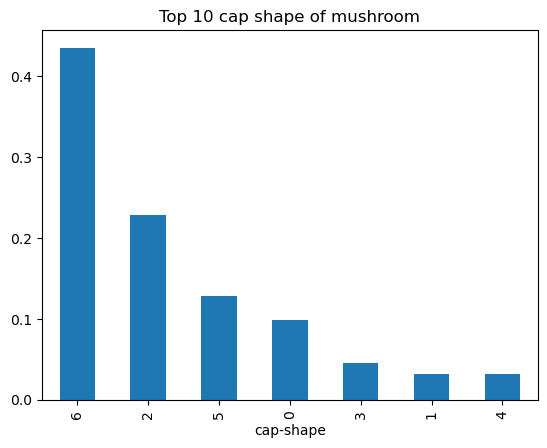

In [18]:
cap_shape_vals = mushroom['cap-shape'].value_counts()[:10]

display(cap_shape_vals / mushroom.shape[0])

# Creating a bar chart of the Top 10 cap shapes
(cap_shape_vals / mushroom.shape[0]).plot(kind='bar')
plt.title('Top 10 cap shape of mushroom')
plt.show()